In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [3]:
train=pd.read_csv(r"C:\Users\RENUKA\Downloads\DailyDelhiClimateTest\DailyDelhiClimateTrain.csv",parse_dates=['date'],index_col="date")
test=pd.read_csv(r"C:\Users\RENUKA\Downloads\DailyDelhiClimateTest\DailyDelhiClimateTest.csv",parse_dates=['date'],index_col="date")

In [4]:
train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
train.isna().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [6]:
test.isna().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [7]:
train.fillna(train.mean(), inplace = True)

In [8]:
test.fillna(test.mean(), inplace = True)

In [9]:
test.shape

(114, 4)

In [10]:
train.shape

(1462, 4)

In [11]:
climate_df=pd.concat([train,test])
climate_df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [12]:
climate_df['day']=climate_df.index.day

In [13]:
climate_df['month']=climate_df.index.month

In [14]:
climate_df['year']=climate_df.index.year

In [15]:
climate_df.sample()

,meantemp,humidity,wind_speed,meanpressure,day,month,year
date,,,,,,,
2017-01-06,19.318182,79.318182,8.681818,1011.772727,6,1,2017


In [16]:
import plotly.graph_objects as go

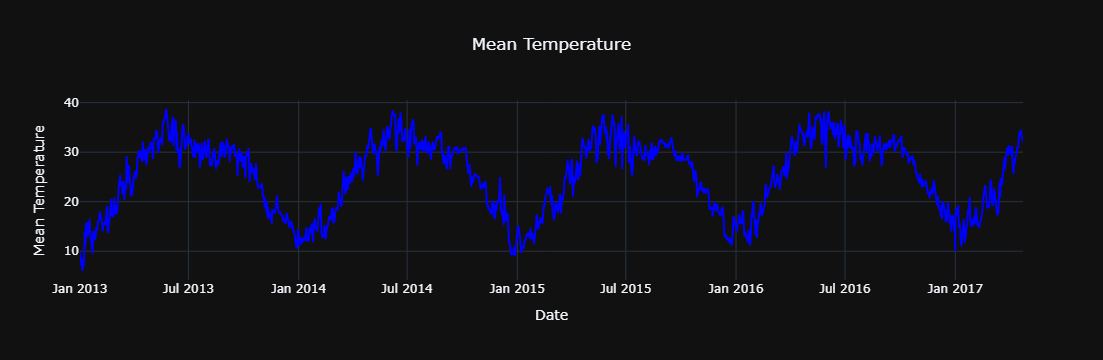

In [17]:
fig_temp=go.Figure()
fig_temp.add_trace(go.Scatter(x=climate_df.index,
                             y=climate_df['meantemp'],
                             mode='lines',
                   line=dict(color='Blue')))
fig_temp.update_layout(title="Mean Temperature",
                       xaxis_title='Date',
                       yaxis_title='Mean Temperature',
                       template='plotly_dark',
                       title_x=0.5)
fig_temp.show()

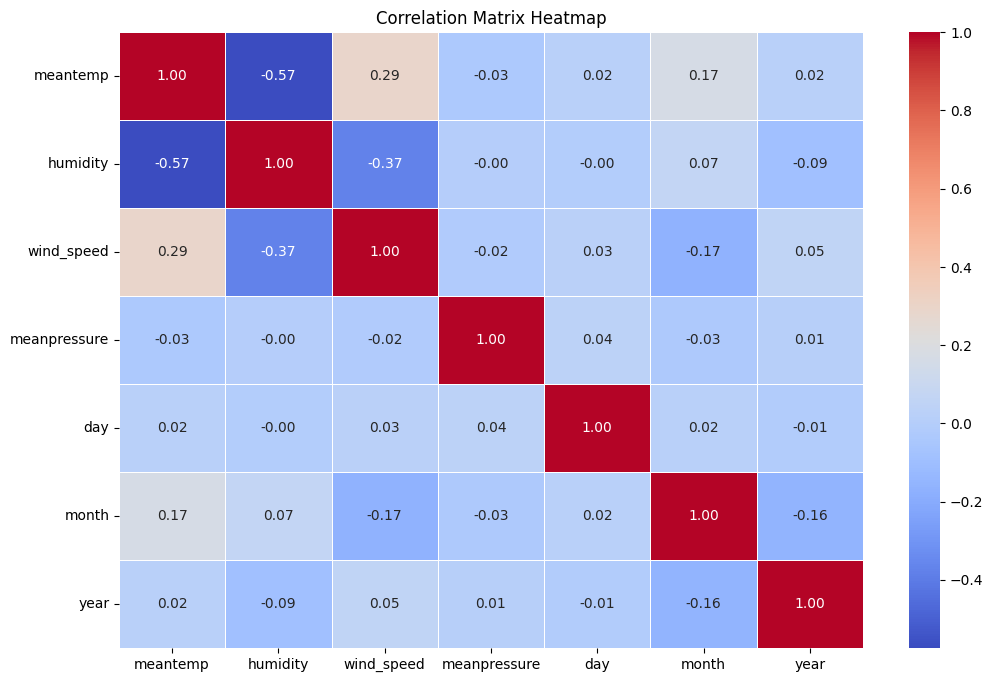

In [18]:
# 🔹 Correlation matrix
corr_matrix = climate_df.corr(numeric_only=True)

# 🔹 Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [19]:
numeric_df=climate_df.select_dtypes(include=[np.number])

In [20]:
numeric_df=numeric_df.drop(['day','month','year'],axis=1)

In [21]:
corr=numeric_df.corr()

<Axes: >

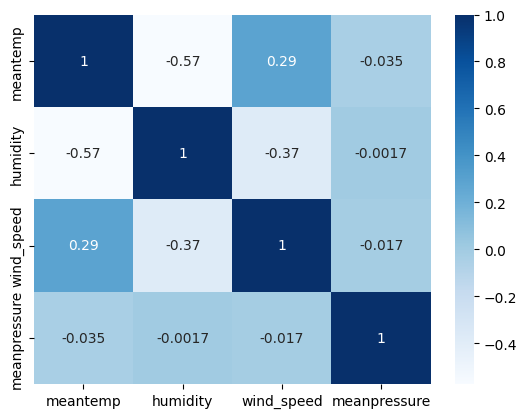

In [22]:
sns.heatmap(corr,cmap='Blues',annot=True)

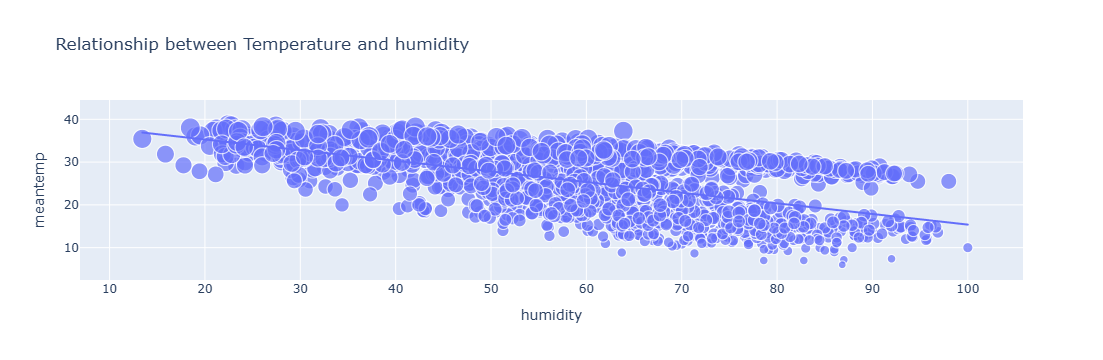

In [23]:
import plotly.express as px
figure=px.scatter(climate_df,x='humidity',
                  y='meantemp',
                  size='meantemp',
                  trendline='ols',
                  title='Relationship between Temperature and humidity'
                 )
figure.show()

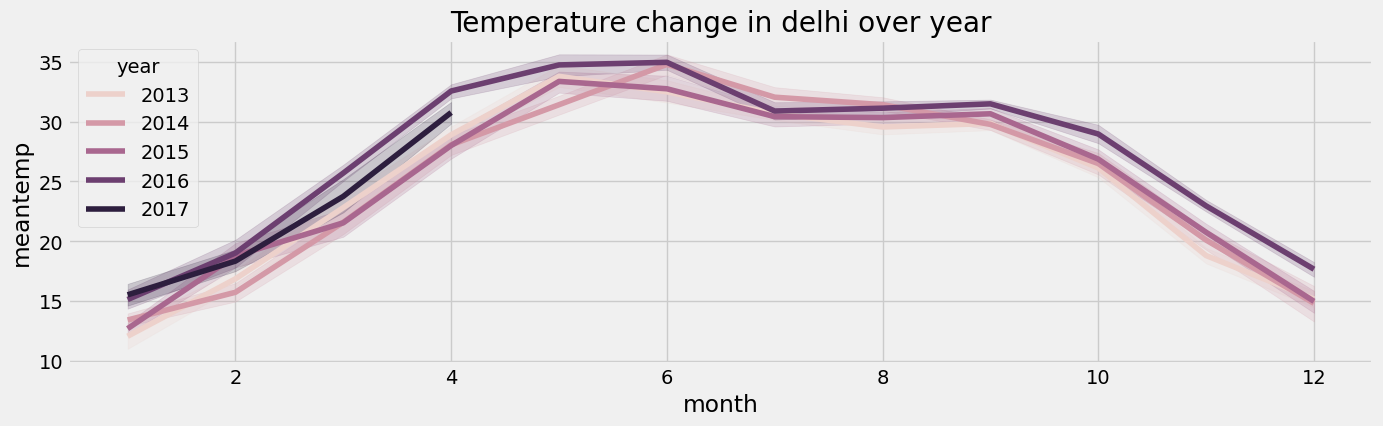

In [24]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,4))
plt.title("Temperature change in delhi over year")
sns.lineplot(climate_df,x='month',y='meantemp',hue='year')
plt.show()

In [25]:
climate_df

,meantemp,humidity,wind_speed,meanpressure,day,month,year
date,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,3,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,4,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,5,1,2013
...,...,...,...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000,20,4,2017
2017-04-21,34.250000,39.375000,6.962500,999.875000,21,4,2017
2017-04-22,32.900000,40.900000,8.890000,1001.600000,22,4,2017


In [26]:
df_copy=climate_df.drop(['day','month','year'],axis=1)

In [27]:
df_copy

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [28]:
df_copy.sample()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-08-09,27.166667,87.5,3.716667,1001.0


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df_copy, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)


In [31]:
length=12
stride=1
data2=[]
target=[]
for i in range(0,len(x_train_scaled)-length+1,stride):
    data2.append(x_train_scaled[i:i+length])
    target.append(x_train_scaled[i+length-1])
data2=np.array(data2)
target=np.array(target)

In [32]:
data2.shape

(1249, 12, 4)

In [33]:
target.shape

(1249, 4)

In [34]:
n_features=data2.shape[2]

In [35]:
n_features

4

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,LSTM,Bidirectional,Dropout

In [37]:
model=Sequential()
model.add(SimpleRNN(units=128,activation='relu',input_shape=(length,n_features)))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

C:\Users\RENUKA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,393 (107.00 KB)

 Trainable params: 27,393 (107.00 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.fit(data2,target, epochs = 25, batch_size =10)

Epoch 1/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0931
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0689
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0673
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0660
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0668
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0660
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0655
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0647
Epoch 9/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0640
Epoch 10/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0651
Epoch 11/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0648
Epoch 12/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0642
Epoch 13/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0654
Epoch 14/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0639
Epoch 15/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

<Axes: >

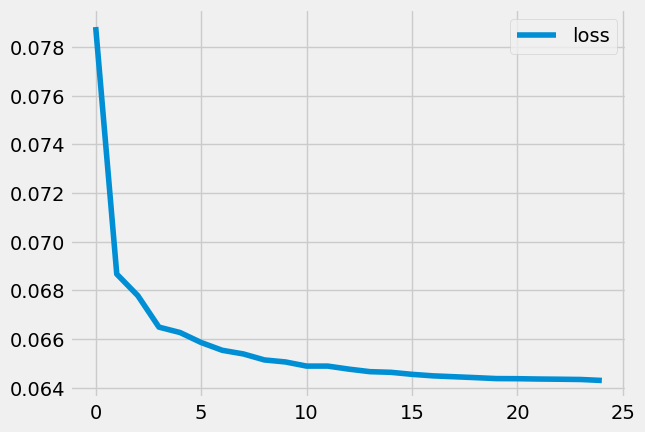

In [40]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [52]:
model_LSTM = Sequential()
model_LSTM .add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(length, n_features)))
model_LSTM .add(Dropout(0.2))
model_LSTM .add(LSTM(units=32, activation='relu'))
model_LSTM .add(Dropout(0.2))
model_LSTM .add(Dense(1))

model_LSTM .compile(optimizer='adam', loss='mse')


In [53]:
model_LSTM .summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 12, 64)              │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,113 (117.63 KB)

 Trainable params: 30,113 (117.63 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model_LSTM loss_df = pd.DataFrame(model.history.history)
loss_df.plot().fit(data2,target, epochs = 25, batch_size =10)

Epoch 1/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1048
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0696
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0687
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0680
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0688
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0693
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0693
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0676
Epoch 9/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0693
Epoch 10/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0678
Epoch 11/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0668
Epoch 12/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0669
Epoch 13/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0679
Epoch 14/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0676
Epoch 15/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - lo

<Axes: >

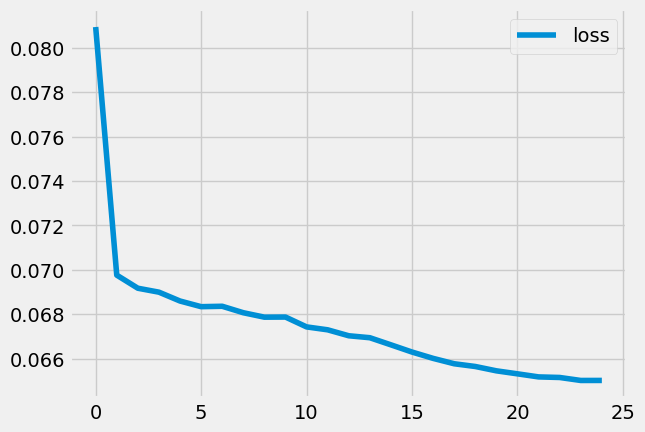

In [55]:
loss_df = pd.DataFrame(model_LSTM.history.history)
loss_df.plot()

In [68]:
# Step 9: Predict on new data (last 12 samples)
latest_input = scaled_data[-12:]
latest_input = latest_input.reshape(1, 12, 4)  # (1 sample, 12 timesteps, 4 features)
predicted_scaled = model.predict(latest_input)
print("Predicted (scaled meantemp):", predicted_scaled)

# Step 10: Inverse scale the prediction
# We'll make a dummy array with predicted meantemp and zeros for other features
dummy_input = np.zeros((1, 4))
dummy_input[0][0] = predicted_scaled  # put predicted meantemp

inversed = scaler.inverse_transform(dummy_input)
print("Predicted meantemp (actual scale):", inversed[0][0])

NameError: name 'scaled_data' is not defined